In [30]:
import ROOT
import numpy as np
from matplotlib import pyplot as plt
!pwd
!ls -lrt fitDiag*.root

/uscms_data/d3/npoudyal/TTGammaSemiLeptonic13TeV/Plotting/CombineFitting/ZJetsFittingAllYear
-rw-r--r-- 1 npoudyal us_cms 124026 May  4 16:40 fitDiagnosticsCR1_2018.root
-rw-r--r-- 1 npoudyal us_cms 124018 May  4 16:40 fitDiagnosticsCR5_2018.root
-rw-r--r-- 1 npoudyal us_cms 124289 May  4 16:40 fitDiagnosticsCR7_2016.root
-rw-r--r-- 1 npoudyal us_cms 123988 May  4 16:40 fitDiagnosticsCR5_2017.root
-rw-r--r-- 1 npoudyal us_cms 124028 May  4 16:40 fitDiagnosticsCR123_2017.root
-rw-r--r-- 1 npoudyal us_cms 123987 May  4 16:40 fitDiagnosticsSR8_2018.root
-rw-r--r-- 1 npoudyal us_cms 124061 May  4 16:40 fitDiagnosticsCR4_2017.root
-rw-r--r-- 1 npoudyal us_cms 124173 May  4 16:40 fitDiagnosticsCR7_2017.root
-rw-r--r-- 1 npoudyal us_cms 124094 May  4 16:40 fitDiagnosticsCR2_2017.root
-rw-r--r-- 1 npoudyal us_cms 124230 May  4 16:40 fitDiagnosticsCR6_2016.root
-rw-r--r-- 1 npoudyal us_cms 124125 May  4 16:40 fitDiagnosticsCR4_2016.root
-rw-r--r-- 1 npoudyal us_cms 124018 May  4 16:40 fitDiagno

In [31]:
ListOfFiles2016 = ["fitDiagnosticsCR123_2016.root", "fitDiagnosticsCR1_2016.root",  "fitDiagnosticsCR4_2016.root", "fitDiagnosticsCR6_2016.root",
			   "fitDiagnosticsCR2_2016.root", "fitDiagnosticsCR5_2016.root", "fitDiagnosticsCR7_2016.root", "fitDiagnosticsCR3_2016.root"]


ListOfFiles2017 = ["fitDiagnosticsCR123_2017.root", "fitDiagnosticsCR1_2017.root",  "fitDiagnosticsCR4_2017.root", "fitDiagnosticsCR6_2017.root",
			   "fitDiagnosticsCR2_2017.root", "fitDiagnosticsCR5_2017.root", "fitDiagnosticsCR7_2017.root", "fitDiagnosticsCR3_2017.root"]

ListOfFiles2018 = ["fitDiagnosticsCR123_2018.root", "fitDiagnosticsCR1_2018.root",  "fitDiagnosticsCR4_2018.root", "fitDiagnosticsCR6_2018.root",
			   "fitDiagnosticsCR2_2018.root", "fitDiagnosticsCR5_2018.root", "fitDiagnosticsCR7_2018.root", "fitDiagnosticsCR3_2018.root"]

In [32]:
controlRegionDict ={"SR8":"tight", "CR123":"looseCRge2e0", "CR7":"looseCRe3ge2", "CR3":"looseCRge4e0", "CR2":"looseCRe3e0", 
				   "CR4":"looseCRe2e1", "CR1":"looseCRe2e0", "CR6":"looseCRe2e2", "CR5":"looseCRe3e1" }

CRDict ={"SR8":"zjetsfSReight", "CR123":"zjetsfCRall", "CR7":"zjetsfCRseven", "CR3":"zjetsfCRthree", "CR2":"zjetsfCRtwo", 
		 "CR4":"zjetsfCRfour", "CR1":"zjetsfCRone", "CR6":"zjetsfCRsix", "CR5":"zjetsfCRfive" }

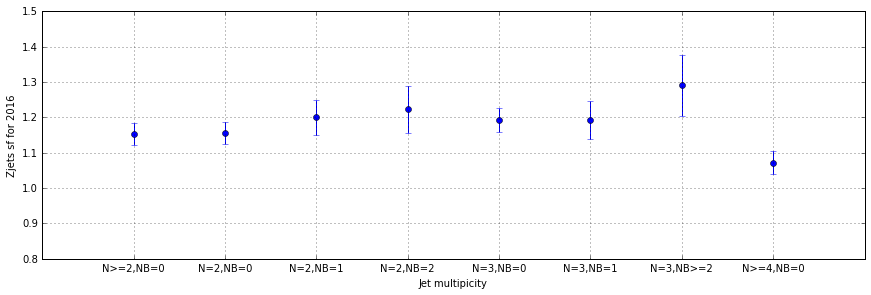

In [33]:
# x = [2, 3, 4, 5,]
# myCR = ["N>=2,NB=0", "N=2,NB=0", "N=3,NB=0", "N>=4,NB=0", "N=2,NB=1"]
# myCR = ["N>=2,NB=0", "N=2,NB=0", "N=3,NB=0", "N>=4,NB=0"]
x = [2, 3, 4, 5, 6, 7, 8, 9]
myCR = ["N>=2,NB=0", "N=2,NB=0", "N=2,NB=1", "N=2,NB=2", "N=3,NB=0", "N=3,NB=1", "N=3,NB>=2","N>=4,NB=0"]

y =[]
yerrUp = []
yerrDo = []
for ifile in ListOfFiles2016:
    myfile = ROOT.TFile(ifile,"read")
    if myfile.GetListOfKeys().Contains("fit_s") is False:
        print ifile[14:-10], ": Fit failed."
        continue
    fit_s = myfile.Get("fit_s")
    y.append(fit_s.floatParsFinal().find("r").getVal())
    yerrUp.append(fit_s.floatParsFinal().find("r").getErrorHi())
    yerrDo.append(fit_s.floatParsFinal().find("r").getErrorLo())
#     print fit_s.floatParsFinal().find("r").getVal(),fit_s.floatParsFinal().find("r").getErrorHi(),fit_s.floatParsFinal().find("r").getErrorLo()
#     print fit_s.floatParsFinal().find("ZGammaBkgPhotonSF").getVal(),fit_s.floatParsFinal().find("r").getErrorLo(),fit_s.floatParsFinal().find("ZGammaBkgPhotonSF").getErrorHi()
#     print fit_s.floatParsFinal().find("WGammaBkgPhotonSF").getVal(),fit_s.floatParsFinal().find("r").getErrorLo(),fit_s.floatParsFinal().find("WGammaBkgPhotonSF").getErrorHi()
fig = plt.figure(figsize=(12, 4))
plt.errorbar(x, y, yerr=yerrUp, fmt='o')
plt.xticks(x, myCR)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.xlim(1,10)
plt.ylim(0.8,1.5)
plt.tight_layout()
plt.grid()
plt.ylabel('Zjets sf for 2016')
plt.xlabel('Jet multipicity')
plt.title('')
plt.show()
fig.savefig('ZJ16.pdf', bbox_inches="tight", dpi=1200)

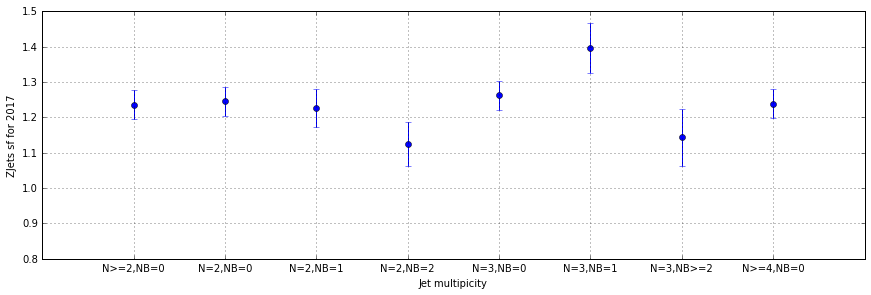

In [23]:
x = [2, 3, 4, 5, 6, 7, 8, 9]
myCR = ["N>=2,NB=0", "N=2,NB=0", "N=2,NB=1", "N=2,NB=2", "N=3,NB=0", "N=3,NB=1", "N=3,NB>=2","N>=4,NB=0"]

y =[]
yerrUp = []
yerrDo = []
for ifile in ListOfFiles2017:
    myfile = ROOT.TFile(ifile,"read")
    if myfile.GetListOfKeys().Contains("fit_s") is False:
        print ifile[14:-10], ": Fit failed."
        continue
    fit_s = myfile.Get("fit_s")
    y.append(fit_s.floatParsFinal().find("r").getVal())
    yerrUp.append(fit_s.floatParsFinal().find("r").getErrorHi())
    yerrDo.append(fit_s.floatParsFinal().find("r").getErrorLo())
#     print fit_s.floatParsFinal().find("r").getVal(),fit_s.floatParsFinal().find("r").getErrorHi(),fit_s.floatParsFinal().find("r").getErrorLo()
#     print fit_s.floatParsFinal().find("ZGammaBkgPhotonSF").getVal(),fit_s.floatParsFinal().find("r").getErrorLo(),fit_s.floatParsFinal().find("ZGammaBkgPhotonSF").getErrorHi()
#     print fit_s.floatParsFinal().find("WGammaBkgPhotonSF").getVal(),fit_s.floatParsFinal().find("r").getErrorLo(),fit_s.floatParsFinal().find("WGammaBkgPhotonSF").getErrorHi()
fig = plt.figure(figsize=(12, 4))
plt.errorbar(x, y, yerr=yerrUp, fmt='o')
plt.xticks(x, myCR)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.xlim(1,10)
plt.ylim(0.8,1.5)
plt.tight_layout()
plt.grid()
plt.ylabel('ZJets sf for 2017')
plt.xlabel('Jet multipicity')
plt.title('')
plt.show()
fig.savefig('ZJ17.pdf', bbox_inches="tight", dpi=1200)

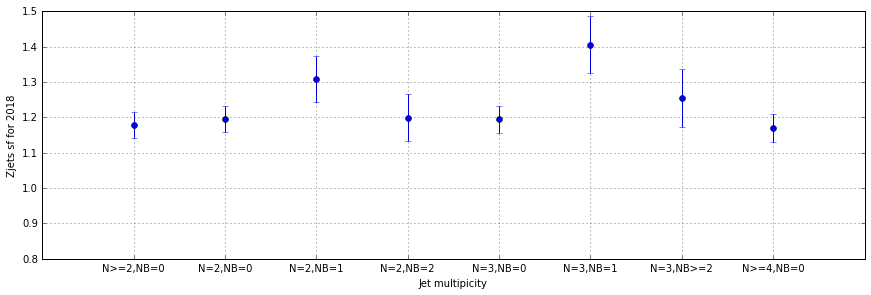

In [24]:
x = [2, 3, 4, 5, 6, 7, 8, 9]
myCR = ["N>=2,NB=0", "N=2,NB=0", "N=2,NB=1", "N=2,NB=2", "N=3,NB=0", "N=3,NB=1", "N=3,NB>=2","N>=4,NB=0"]

y =[]
yerrUp = []
yerrDo = []
for ifile in ListOfFiles2018:
    myfile = ROOT.TFile(ifile,"read")
    if myfile.GetListOfKeys().Contains("fit_s") is False:
        print ifile[14:-10], ": Fit failed."
        continue
    fit_s = myfile.Get("fit_s")
    y.append(fit_s.floatParsFinal().find("r").getVal())
    yerrUp.append(fit_s.floatParsFinal().find("r").getErrorHi())
    yerrDo.append(fit_s.floatParsFinal().find("r").getErrorLo())
#     print fit_s.floatParsFinal().find("r").getVal(),fit_s.floatParsFinal().find("r").getErrorHi(),fit_s.floatParsFinal().find("r").getErrorLo()
#     print fit_s.floatParsFinal().find("ZGammaBkgPhotonSF").getVal(),fit_s.floatParsFinal().find("r").getErrorLo(),fit_s.floatParsFinal().find("ZGammaBkgPhotonSF").getErrorHi()
#     print fit_s.floatParsFinal().find("WGammaBkgPhotonSF").getVal(),fit_s.floatParsFinal().find("r").getErrorLo(),fit_s.floatParsFinal().find("WGammaBkgPhotonSF").getErrorHi()
fig = plt.figure(figsize=(12, 4))
plt.errorbar(x, y, yerr=yerrUp, fmt='o')
plt.xticks(x, myCR)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.xlim(1,10)
plt.ylim(0.8,1.5)
plt.tight_layout()
plt.grid()
plt.ylabel('Zjets sf for 2018')
plt.xlabel('Jet multipicity')
plt.title('')
plt.show()
fig.savefig('ZJ18.pdf', bbox_inches="tight", dpi=1200)